In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from astropy.io import fits # It's used for read Python FITS files

# Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/galah_dr4_allstar_240705.fits"
hdu = fits.open(file_path)

Mounted at /content/drive


In [ ]:
hdu.info()

Filename: /content/drive/MyDrive/galah_dr4_allstar_240705.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  Joined        1 BinTableHDU    801   917588R x 184C   [K, 17A, K, 17A, J, 7A, E, D, D, J, J, J, J, E, E, E, E, E, K, 16A, 16A, E, L, E, E, E, E, E, E, D, E, E, E, E, E, E, J, E, E, E, E, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, E, D, E, E, E, E, E, E, E, E, E, K]   


In [ ]:
print(len(hdu)) # First one is the header, second one is the data

2


In [ ]:
print(hdu[0].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
print(hdu[1].columns)

ColDefs(
    name = 'sobject_id'; format = 'K'; null = -9223372036854775808
    name = 'tmass_id'; format = '17A'
    name = 'gaiadr3_source_id'; format = 'K'; null = -9223372036854775808
    name = 'survey_name'; format = '17A'
    name = 'field_id'; format = 'J'; null = -2147483648
    name = 'setup'; format = '7A'
    name = 'mjd'; format = 'E'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'flag_sp'; format = 'J'; null = -2147483648
    name = 'flag_sp_fit'; format = 'J'; null = -2147483648
    name = 'opt_loop'; format = 'J'; null = -2147483648
    name = 'flag_red'; format = 'J'; null = -2147483648
    name = 'snr_px_ccd1'; format = 'E'
    name = 'snr_px_ccd2'; format = 'E'
    name = 'snr_px_ccd3'; format = 'E'
    name = 'snr_px_ccd4'; format = 'E'
    name = 'chi2_sp'; format = 'E'
    name = 'px_used_perc'; format = 'K'; null = -9223372036854775808
    name = 'model_name'; format = '16A'
    name = 'closest_model'; format = '16A'
    name = 'comp_tim

In [ ]:
data_hdu = hdu[1].data # It assigns the data of hdu[1] to the data_hdu

In [ ]:
df = pd.DataFrame(data_hdu)

In [ ]:
df.head()

,sobject_id,tmass_id,gaiadr3_source_id,survey_name,field_id,setup,mjd,ra,dec,flag_sp,...,parallax_error,ew_li,e_ew_li_low,e_ew_li_upp,a_li,a_li_upp_lim,e_a_li_low,e_a_li_upp,e_a_li_teff,flag_a_li
0,170910004101274,00000011+0522500,2745049530295263232,galah_faint,6882,allstar,58006.613281,0.000500,5.380556,0,...,0.023296,1.223786,1.738979,2.281299,NaN,-0.403898,NaN,NaN,NaN,1
1,161116001701360,00000023-5709445,4922452332795612416,galah_faint,6863,allstar,57708.425781,0.001000,-57.162334,0,...,0.019836,-4.275734,2.556098,3.003688,NaN,0.241837,NaN,NaN,NaN,1
2,161116001701016,00000024-5742487,4919409709243747968,galah_faint,6863,allstar,57708.425781,0.001000,-57.713528,0,...,0.028713,7.537802,2.158769,1.551411,1.115057,NaN,0.150386,0.083121,0.067928,0
3,140713004601361,00000025-7541166,4685221429109310080,galah_main,182,allstar,56851.773438,0.001042,-75.687943,0,...,0.010136,1.651241,1.856416,1.354407,NaN,0.839293,NaN,NaN,NaN,1
4,140708007101175,00000038-7756270,4683766775225601664,galah_main,245,allstar,56846.816406,0.001583,-77.940865,0,...,0.014520,4.929950,2.442038,2.745774,0.350810,NaN,0.300046,0.196198,0.084349,0


In [ ]:
print(df.shape) # There are 917.588 rows and 184 columns in the dataset

(917588, 184)


# Embedded Dataset

In [ ]:
features = [
    # Basic physical properties
    "teff", "logg", "fe_h", "mass", "age", "lbol", "r_med", "parallax", "ruwe",

    # Chemical abundances
    "a_li", "c_fe", "n_fe", "o_fe", "mg_fe", "si_fe", "ca_fe", "ti_fe",

    # Photometric measurements
    "phot_g_mean_mag", "bp_rp", "j_m", "h_m", "ks_m", "W2mag",

    # Measurement uncertainties (may improve model reliability)
    "e_teff", "e_logg", "e_fe_h",

    # Spectrum quality and measurement reliability
    "chi2_sp", "snr_px_ccd1", "snr_px_ccd2", "snr_px_ccd3", "snr_px_ccd4",

    # Atmospheric parameters (rotation & microturbulence)
    "vmic", "vsini"
]


In [ ]:
df_embedded = df[features] # create a new dataframe

In [ ]:
df_embedded.head()

,teff,logg,fe_h,mass,age,lbol,r_med,parallax,ruwe,a_li,...,e_teff,e_logg,e_fe_h,chi2_sp,snr_px_ccd1,snr_px_ccd2,snr_px_ccd3,snr_px_ccd4,vmic,vsini
0,4486.255371,4.657445,-0.396317,0.639813,3.215799,0.140876,149.605957,6.688344,1.101618,NaN,...,68.002647,0.100572,0.055118,1.161375,26.964375,45.697865,75.889725,72.905983,0.783251,6.911107
1,4900.511719,4.464450,-1.032346,0.752681,0.017005,0.367978,350.318634,2.856548,1.660150,NaN,...,72.155556,0.102015,0.065797,0.677067,39.684574,52.617100,66.097115,56.828625,0.601531,6.739608
2,5543.346191,4.175371,-0.654349,0.867851,13.842698,1.351628,642.353516,1.553138,2.448009,1.115057,...,73.427536,0.102718,0.064612,0.654089,48.891308,66.277039,81.093063,72.222115,0.797474,5.123262
3,5529.029297,4.521021,0.135527,0.943476,3.414711,0.656146,259.545929,3.852431,0.961120,NaN,...,68.877304,0.104782,0.056800,0.863295,54.512363,74.712013,97.874832,91.115067,1.003752,3.940912
4,4977.451172,3.172151,-0.612790,0.939844,10.581185,9.585781,1260.433350,0.793503,1.100875,0.350810,...,74.996758,0.113069,0.065126,0.716525,29.289726,42.882103,55.286251,53.542664,1.217584,3.076616


In [ ]:
df_embedded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917588 entries, 0 to 917587
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   teff             906688 non-null  float32
 1   logg             906688 non-null  float32
 2   fe_h             906688 non-null  float32
 3   mass             906688 non-null  float32
 4   age              904016 non-null  float32
 5   lbol             906688 non-null  float32
 6   r_med            906688 non-null  float32
 7   parallax         911754 non-null  float64
 8   ruwe             911755 non-null  float32
 9   a_li             417828 non-null  float32
 10  c_fe             904936 non-null  float32
 11  n_fe             689576 non-null  float32
 12  o_fe             874246 non-null  float32
 13  mg_fe            898029 non-null  float32
 14  si_fe            885806 non-null  float32
 15  ca_fe            900125 non-null  float32
 16  ti_fe            902775 non-null  floa

In [ ]:
df_embedded.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
teff,906688.0,5501.146973,9.225544e+02,3.000000e+03,4840.319824,5561.052734,6046.285156,8.000000e+03
logg,906688.0,3.562930,9.596220e-01,-4.994881e-01,2.830493,3.967208,4.251806,5.490000e+00
fe_h,906688.0,-0.193090,3.750495e-01,-3.931000e+00,-0.350282,-0.134678,0.038853,1.069000e+00
mass,906688.0,1.154038,3.648297e-01,9.181081e-02,0.943235,1.075756,1.263182,9.520765e+00
age,904016.0,6.003787,3.604399e+00,1.548817e-03,3.055592,5.714857,8.660828,1.479415e+01
lbol,906688.0,67.843788,6.023170e+02,5.500974e-05,1.641675,4.377014,33.766331,2.836183e+05
r_med,906688.0,1307.450317,1.447619e+03,3.219407e+00,541.986572,870.975586,1581.104736,5.090324e+04
parallax,911754.0,1.572429,2.035460e+00,-1.303290e+01,0.629057,1.147149,1.849687,3.106083e+02
ruwe,911755.0,1.641274,3.100672e+00,4.460048e-01,0.971017,1.031034,1.153097,8.781314e+01
a_li,417828.0,1.495077,1.011701e+00,-2.011912e+00,0.733473,1.797853,2.278709,7.260392e+00


In [ ]:
print(df_embedded["age"].max())
print(df_embedded["age"].min())

14.794149398803711
0.0015488165663555264


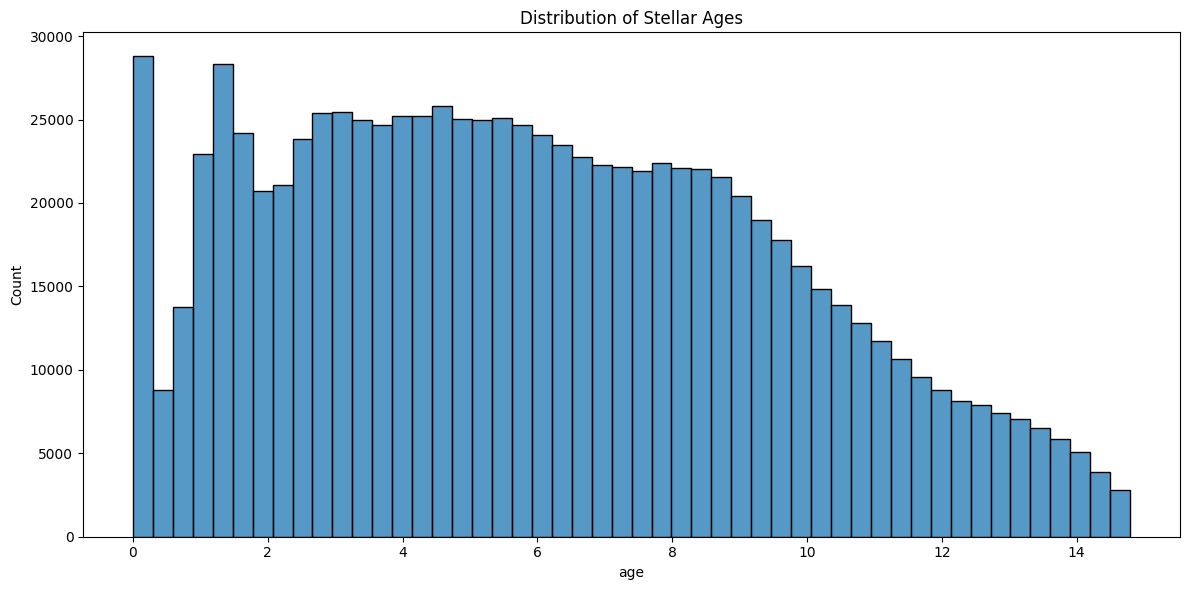

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x="age",data=df_embedded,bins=50) # as the age number increases in the graph, the number of stars recorded decreases
plt.title("Distribution of Stellar Ages")

plt.tight_layout()

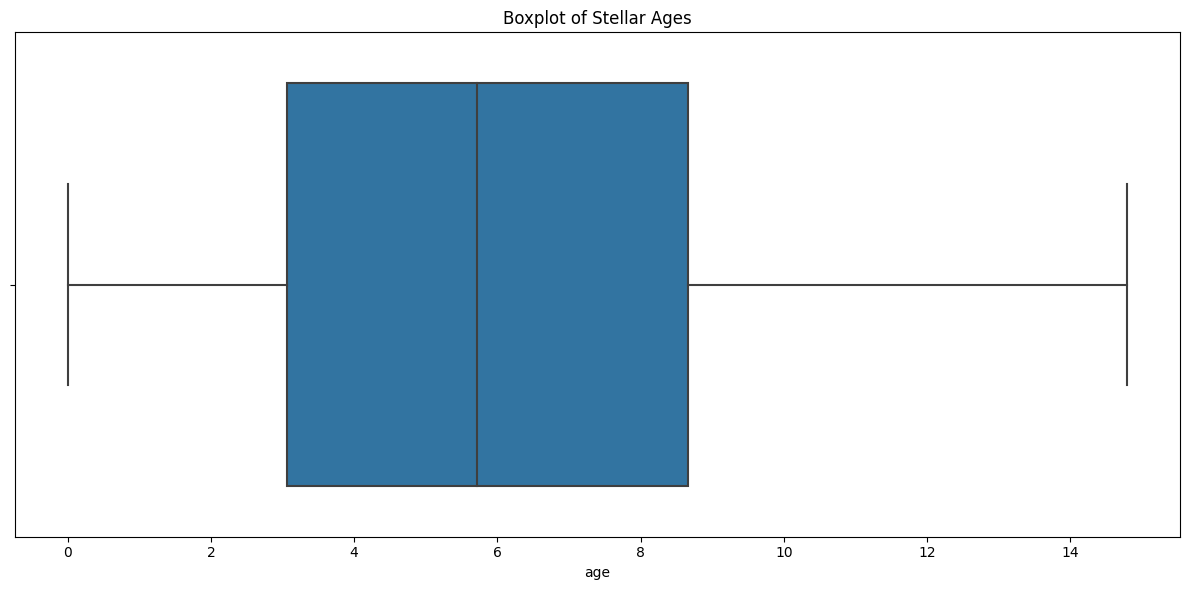

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="age",data=df_embedded) # The median of the dataset is around 6 billion years(Gyr)
plt.title("Boxplot of Stellar Ages")

plt.tight_layout()

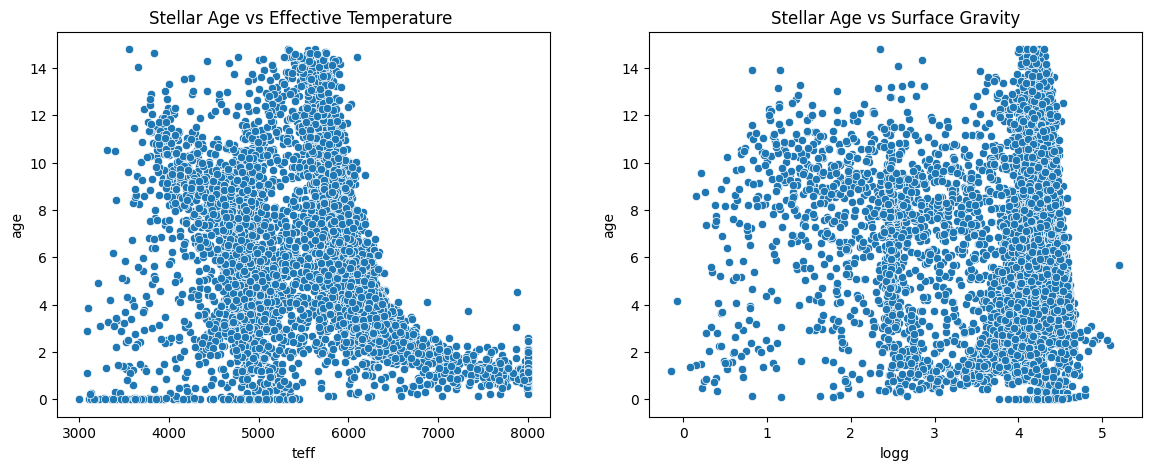

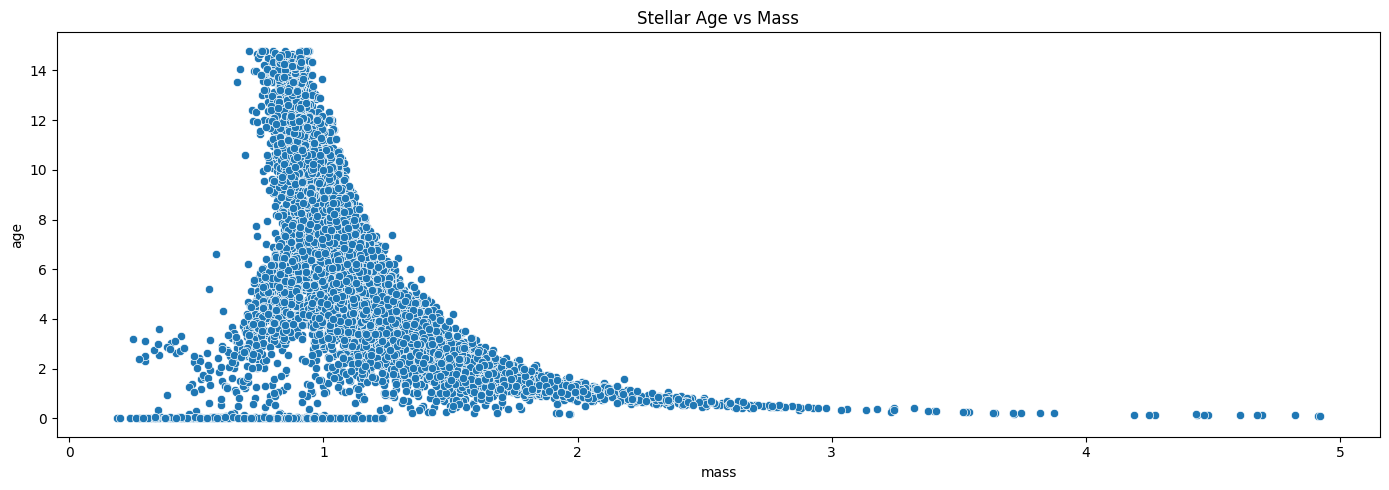

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14,5))

sns.scatterplot(x="teff",y="age",data=df_embedded.sample(5000),ax=axes[0])
axes[0].set_title("Stellar Age vs Effective Temperature ")

sns.scatterplot(x="logg",y="age",data=df_embedded.sample(5000),ax=axes[1])
axes[1].set_title("Stellar Age vs Surface Gravity")

plt.figure(figsize=(14,5))
sns.scatterplot(x="mass",y="age",data=df_embedded.sample(10000))
plt.title("Stellar Age vs Mass")

plt.tight_layout()

# In general, in first graph hotter stars tend to be young, while cooler stars tend to be old.
# Stars across all age ranges are present between logg values of 3 and 6, whereas stars in the 1–2 range are less common, and those in the 0–1 range are rare.

In [ ]:
df_embedded["age_category"] = df_embedded["age"].apply(lambda x: "Protostar" if x<3 else "Young" if x>=3 and x<7 else "Stable" if x>=7 and x<11 else "Evolved")

/tmp/ipython-input-778806209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_embedded["age_category"] = df_embedded["age"].apply(lambda x: "Protostar" if x<3 else "Young" if x>=3 and x<7 else "Stable" if x>=7 and x<11 else "Evolved")


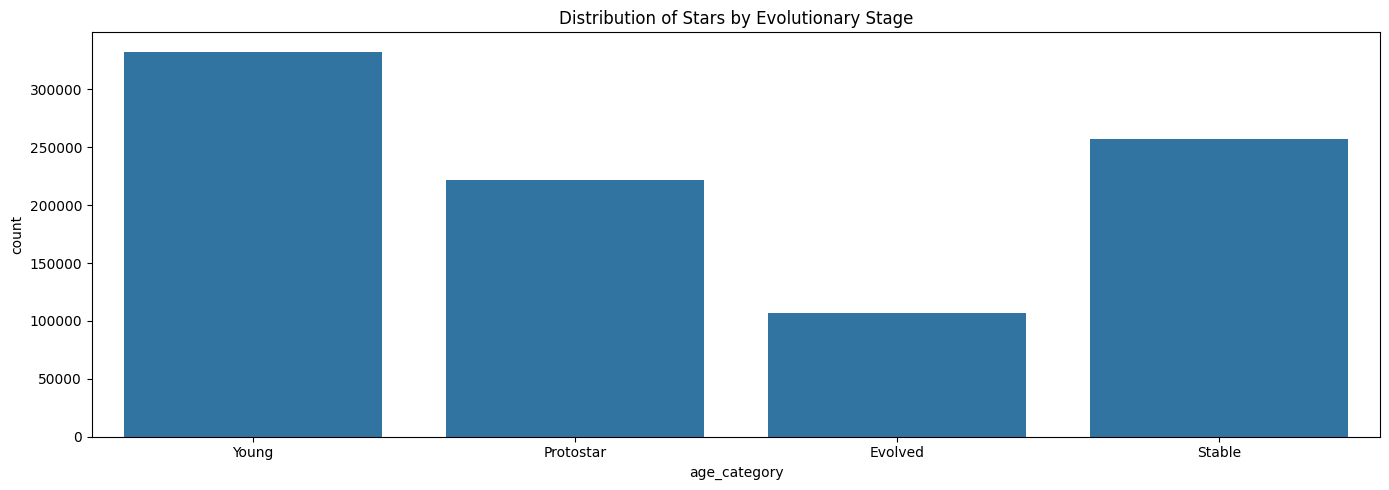

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x="age_category",data=df_embedded)
plt.title("Distribution of Stars by Evolutionary Stage")

plt.tight_layout()
# Protostar - Young - Stable - Evolved

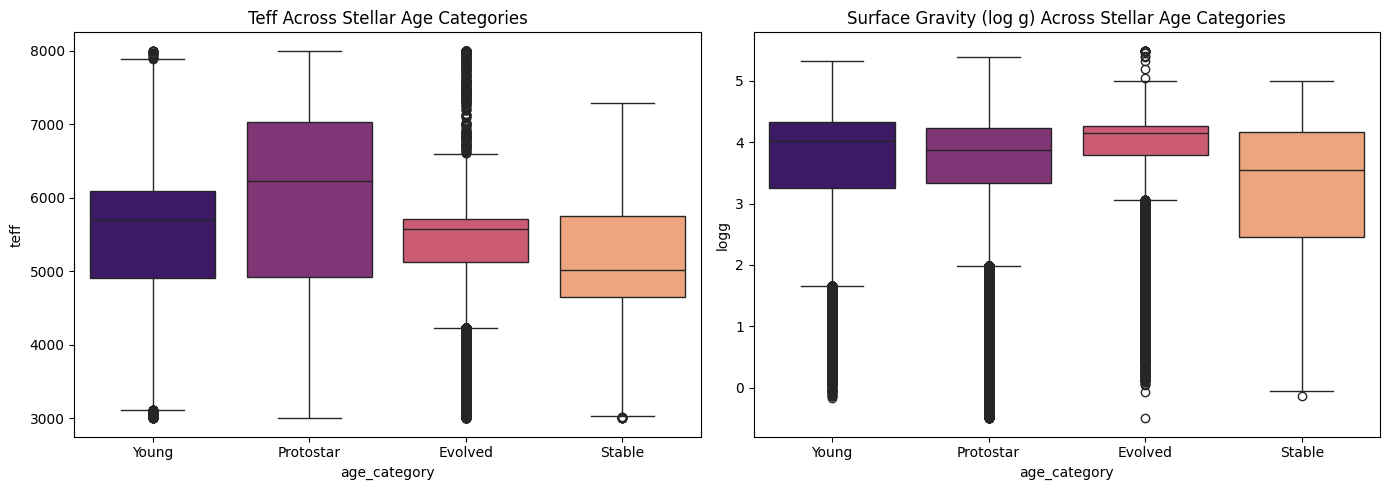

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

sns.boxplot(x="age_category",y="teff",data=df_embedded,ax=axes[0],palette="magma",legend=False,hue="age_category")
axes[0].set_title("Teff Across Stellar Age Categories")

sns.boxplot(x="age_category",y="logg",data=df_embedded,ax=axes[1],palette="magma",legend=False,hue="age_category")
axes[1].set_title("Surface Gravity (log g) Across Stellar Age Categories")

plt.tight_layout()

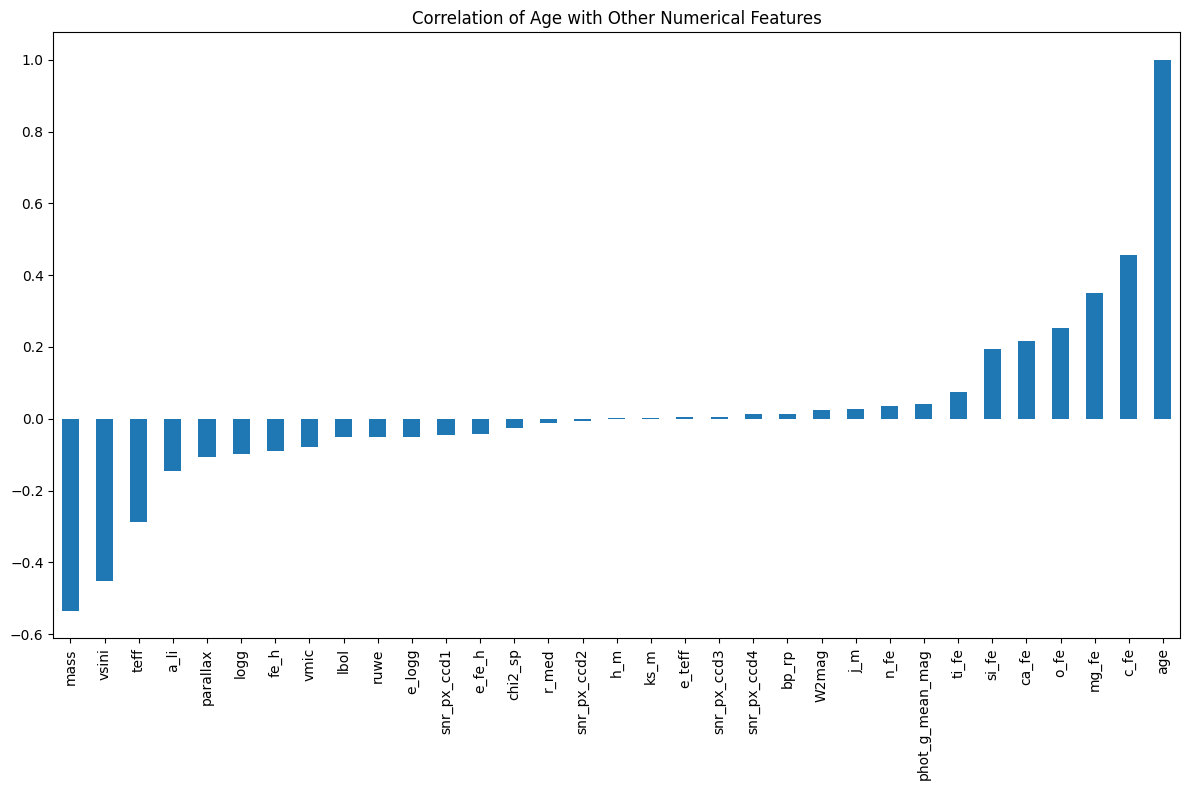

In [ ]:
plt.figure(figsize=(12,8))
df_embedded.corr(numeric_only=True)["age"].sort_values().plot(kind="bar") # The column that is most associated with age is:  (In the embedded dataset)
plt.title("Correlation of Age with Other Numerical Features")

plt.tight_layout()

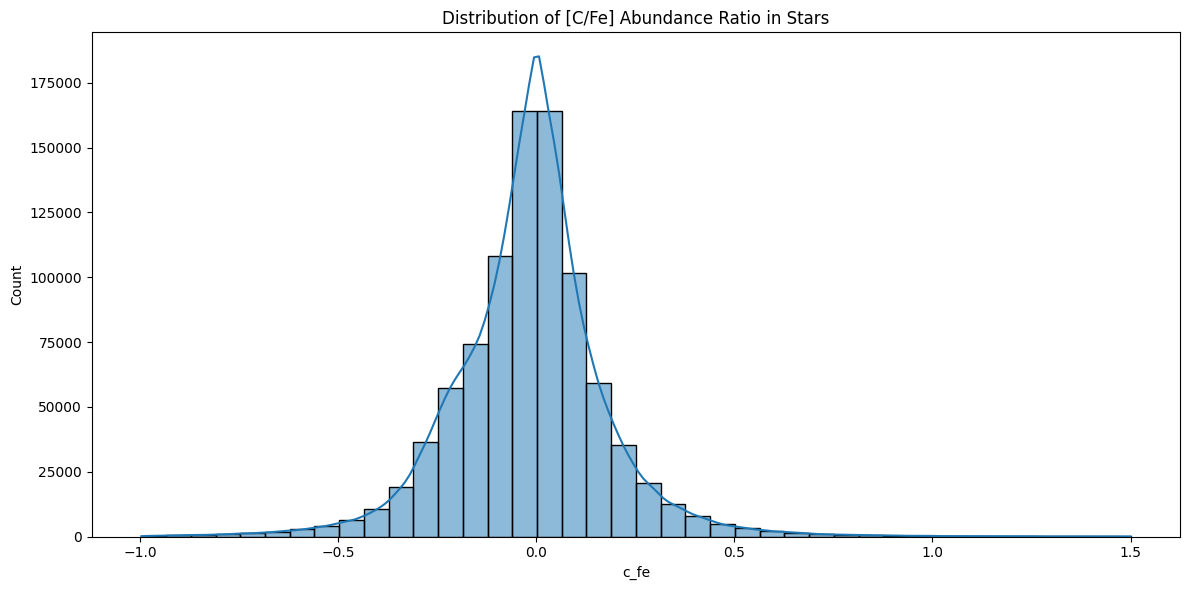

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x="c_fe",data=df_embedded,kde=True,bins=40) # c_fe is the ratio of C/fe
plt.title("Distribution of [C/Fe] Abundance Ratio in Stars")

plt.tight_layout()

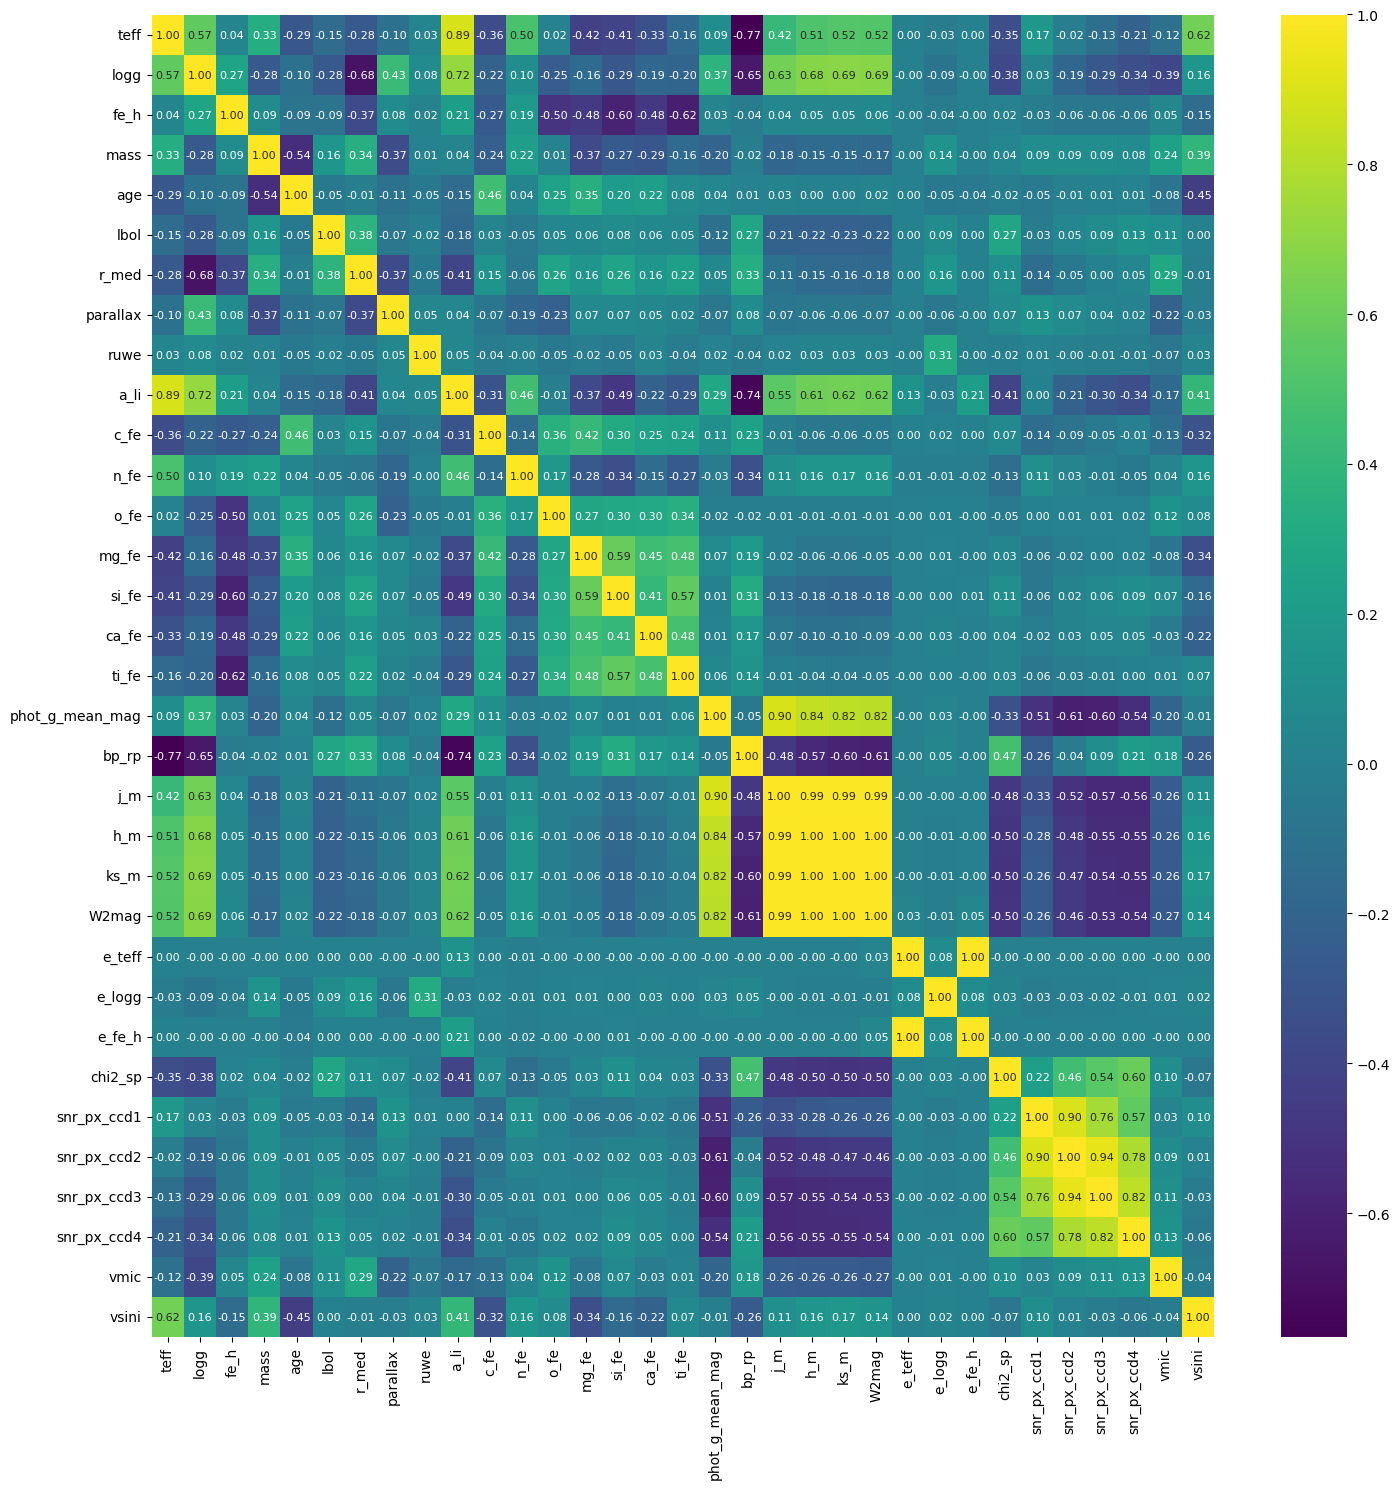

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_embedded.corr(numeric_only=True),cmap="viridis",annot=True,fmt=".2f",annot_kws={"size": 8} )

plt.tight_layout()

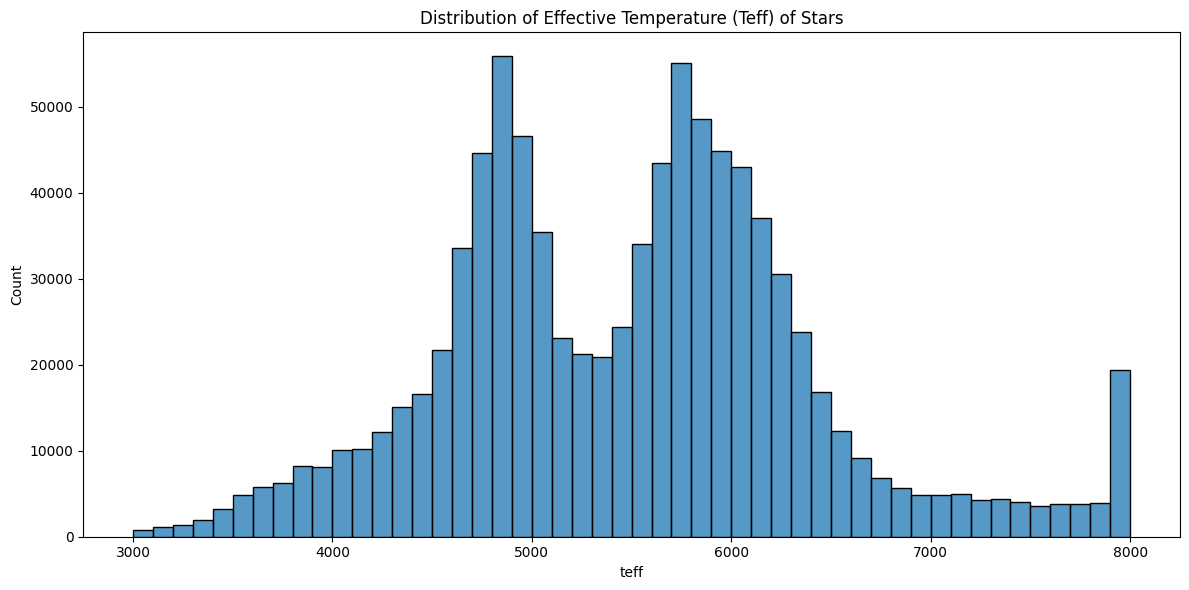

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x="teff",data=df_embedded,bins=50) # Teff's histogram is particularly concentrated between 4000 and 6500, which includes most of the main sequence stars.
plt.title("Distribution of Effective Temperature (Teff) of Stars")

plt.tight_layout()

In [ ]:
#sns.scatterplot(x="teff",y="logg",data=df_df_embedded)
#plt.title("HR Diagram: Teff vs logg Colored by Stellar Age Category")
#plt.tight_layout()

# Protostar (orange) stars generally have a wide temperature range but higher logarithmic values.

# Young (blue) stars are clearly aligned at the top of the main sequence → hot, with high gravity.

# Stable (green) and evolved (red) stars are cooler and shift to lower logarithmic values → also physically expected.

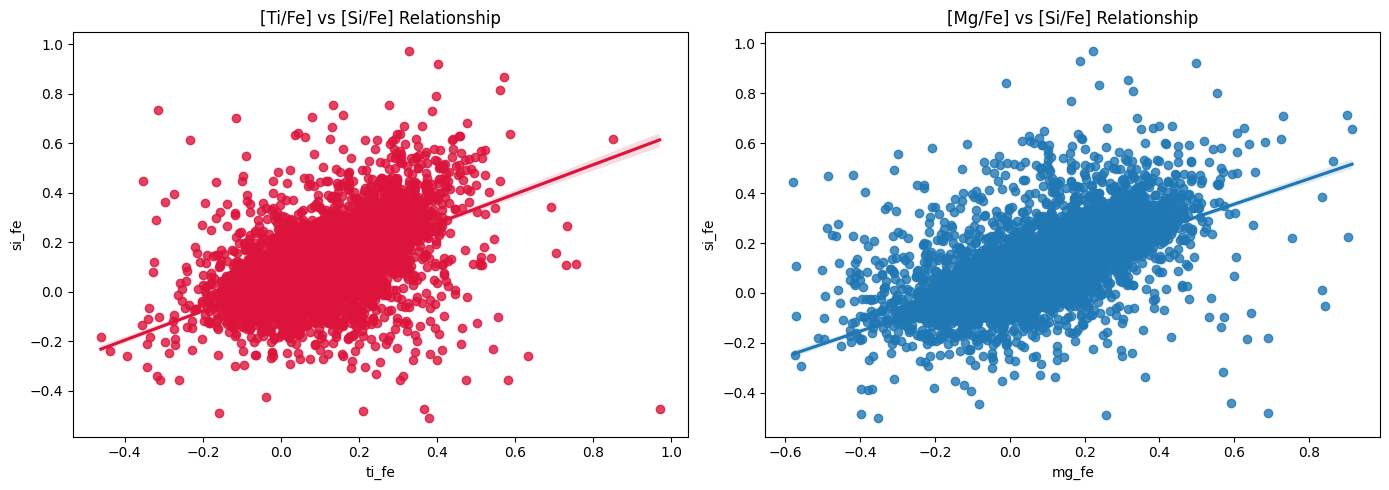

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,5))

sns.regplot(x="ti_fe",y="si_fe",data=df_embedded.sample(10000),ax=axes[0],color="crimson")
axes[0].set_title("[Ti/Fe] vs [Si/Fe] Relationship")

sns.regplot(x="mg_fe",y="si_fe",data=df_embedded.sample(10000),ax=axes[1])
axes[1].set_title("[Mg/Fe] vs [Si/Fe] Relationship")

plt.tight_layout()

# Both [Ti/Fe] and [Mg/Fe] show strong positive correlation with [Si/Fe],
# supporting the idea that these α-elements share common nucleosynthetic origins and may collectively serve as chemical clocks in stellar age estimation.

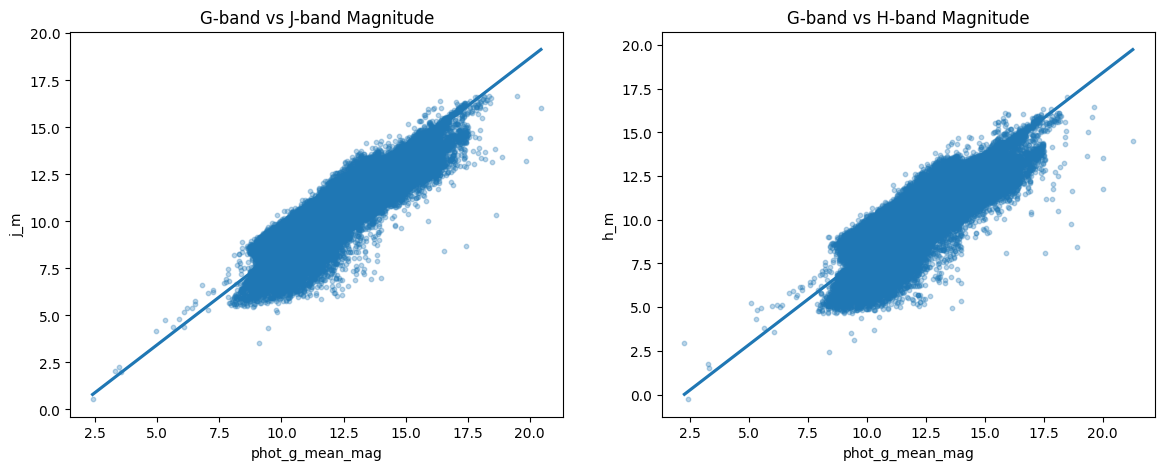

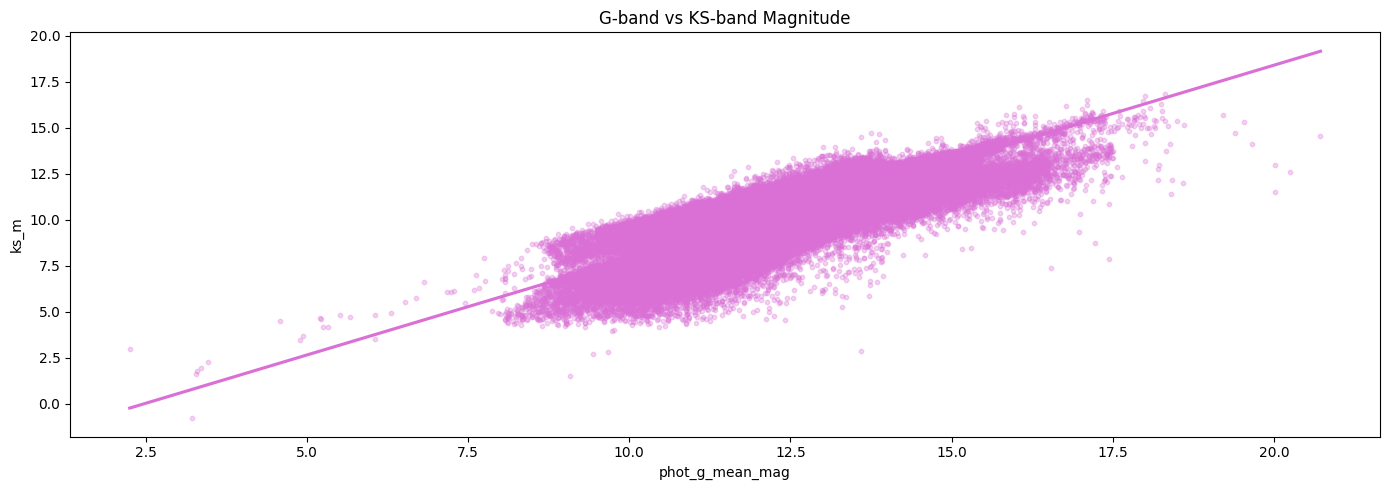

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (14,5))

sns.regplot(x="phot_g_mean_mag",y="j_m",data=df_embedded.sample(300000), scatter_kws={'alpha': 0.3, 's': 10},ax=axes[0]) # There is a strong correlation between j_m and phot_g_mean_mag
axes[0].set_title("G-band vs J-band Magnitude")

sns.regplot(x="phot_g_mean_mag",y="h_m",data=df_embedded.sample(300000), scatter_kws={'alpha': 0.3, 's': 10},ax=axes[1]) # There is also a strong correlation between H_m and phot_g_mean_mag
axes[1].set_title("G-band vs H-band Magnitude")

plt.figure(figsize=(14,5))
sns.regplot(x="phot_g_mean_mag",y="ks_m",data=df_embedded.sample(300000), scatter_kws={'alpha': 0.3, 's': 10},color="orchid")
plt.title("G-band vs KS-band Magnitude")

plt.tight_layout()

In [ ]:
len(df_embedded)

917588

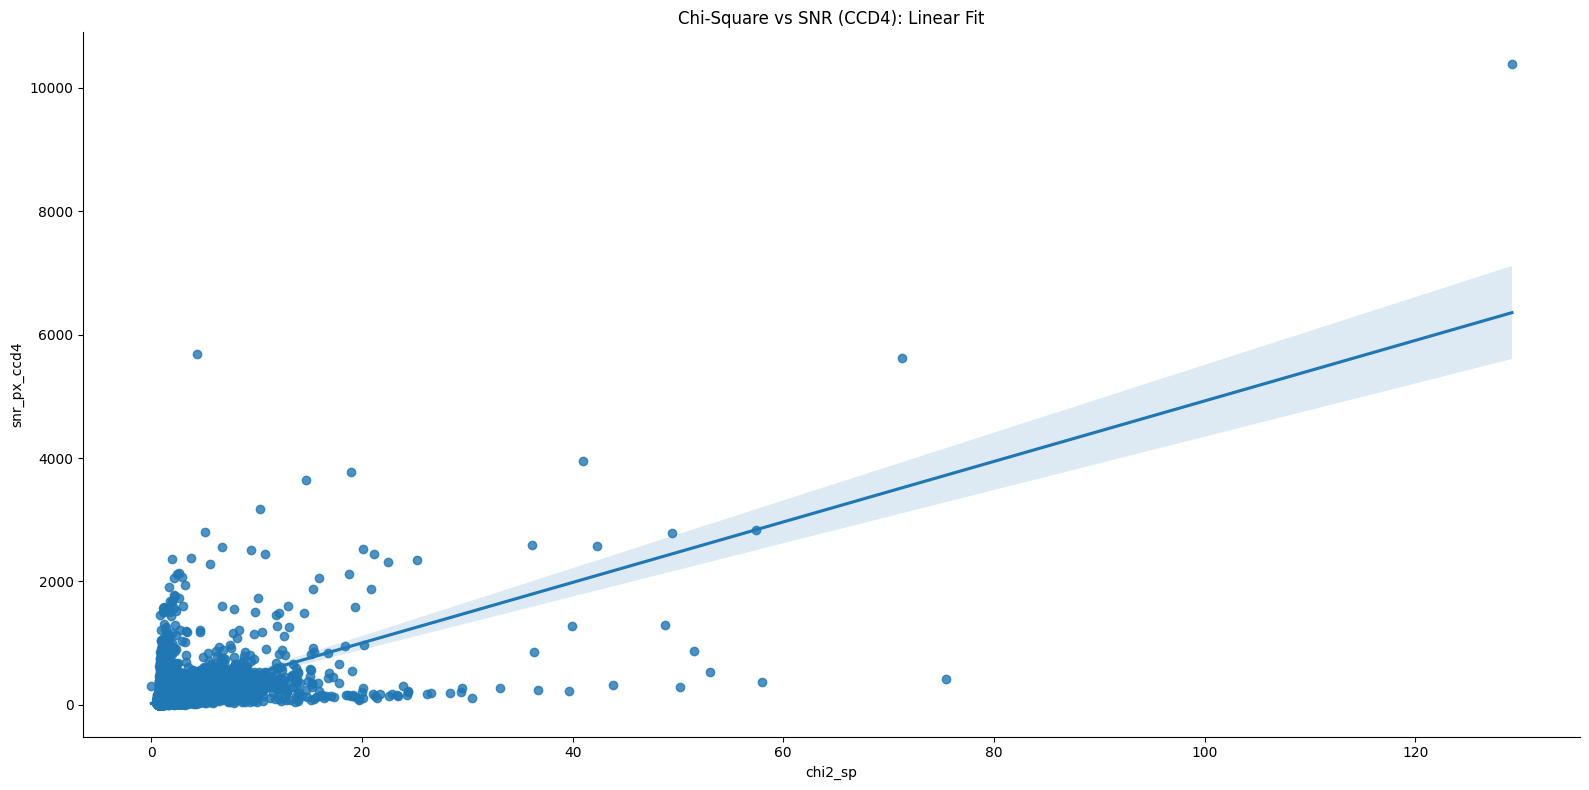

In [ ]:
sns.lmplot(x="chi2_sp", y="snr_px_ccd4", data=df_embedded.sample(n=500000),height=8,aspect=2)
plt.title("Chi-Square vs SNR (CCD4): Linear Fit")

plt.tight_layout()

# Data Preprocessing

In [ ]:
df_new = df.sample(900000,random_state=42) #

In [ ]:
df_new.shape

(900000, 184)

In [ ]:
100 * df_new.isnull().sum() / len(df) # Percantage of the missing values in a dataframe

sobject_id            0.000000
tmass_id              0.000000
gaiadr3_source_id     0.000000
survey_name           0.000000
field_id              0.000000
                       ...    
a_li_upp_lim         47.370933
e_a_li_low           53.460812
e_a_li_upp           53.463101
e_a_li_teff          55.990597
flag_a_li             0.000000
Length: 184, dtype: float64

In [ ]:
sum((100 * df_new.isnull().sum() / len(df_new)) > 40) # The number of columns that missing values of percentages are bigger than 40

28

In [ ]:
for col in df_new.columns:
    percentage = 100 * df_new[col].isnull().sum() / len(df_new)

    if percentage > 40:
        df_new.drop(col,axis=1,inplace=True) # Remove columns with more than 40% missing values.
    else:
        pass

In [ ]:
df_new.shape # 28 columns are dropped

(900000, 156)

In [ ]:
for col in df_new.columns:
    percentage = 100 * df_new[col].isnull().sum() / len(df_new)

    if 0 < percentage < 10:
        df_new[col] = df_new[col].fillna(df_new[col].median()) # fill the all missing columns with the median if their percantages are less than 10
    else:
        pass

In [ ]:
df_new["setup"].value_counts() # All values are same so drop the column
df_new.drop("setup",axis=1,inplace=True)

In [ ]:
df_new.drop("sobject_id",axis=1,inplace=True) # non-efficient features for the training
df_new.drop("tmass_id",axis=1,inplace=True)
df_new.drop("gaiadr3_source_id",axis=1,inplace=True)

In [ ]:
df_new.head()

,survey_name,field_id,mjd,ra,dec,flag_sp,flag_sp_fit,opt_loop,flag_red,snr_px_ccd1,...,ks_msigcom,W2mag,e_W2mag,ruwe,parallax,parallax_error,ew_li,e_ew_li_low,e_ew_li_upp,flag_a_li
527249,galah_main,5227,57498.628906,220.419418,-39.423668,0,0,2,0,39.564186,...,0.021,10.039,0.020,0.964697,0.188377,0.021254,-0.256835,1.572116,1.656530,1
277830,galah_phase2,8067,60036.425781,135.022705,-37.802891,0,0,2,3592,44.777065,...,0.019,9.408,0.021,1.013085,0.624019,0.009889,6.130682,1.845052,1.721033,0
632869,galah_bright,3414,57258.382812,250.870499,-63.959862,32,0,2,0,42.202297,...,0.023,10.736,0.021,1.096781,1.937833,0.018438,44.897865,4.519427,4.606554,0
410244,k2_hermes,6734,57479.507812,180.236923,-3.011167,0,0,2,0,12.468577,...,0.028,12.170,0.024,1.004444,1.620995,0.021623,-3.537717,7.358681,5.812539,1
266480,galah_main,4414,57061.574219,131.556549,-24.813389,32,0,2,0,45.562187,...,0.023,11.495,0.021,1.035173,1.519232,0.013612,-4.217920,6.991775,6.637523,1


In [ ]:
df_new.shape

(900000, 152)

In [ ]:
df_new.drop("W2mag",axis=1,inplace=True) # dropped it because it's correlation number is very close with j_m, h_m and ks_m
df_new.drop("ks_m",axis=1,inplace=True)
df_new.drop("e_teff",axis=1,inplace=True) # dropped it because it's correlation is similar with e_fe_h

In [ ]:
df_new.shape

(900000, 149)

In [ ]:
sum(df_new.isnull().sum() != 0) # There are 18 columns that has missing values

18

In [ ]:
print(df_new.columns.to_list())

['survey_name', 'field_id', 'mjd', 'ra', 'dec', 'flag_sp', 'flag_sp_fit', 'opt_loop', 'flag_red', 'snr_px_ccd1', 'snr_px_ccd2', 'snr_px_ccd3', 'snr_px_ccd4', 'chi2_sp', 'px_used_perc', 'model_name', 'closest_model', 'comp_time', 'fit_global_rv', 'rv_comp_1', 'e_rv_comp_1', 'rv_gaia_dr3', 'e_rv_gaia_dr3', 'v_bary_eff', 'teff', 'logg', 'e_logg', 'fe_h', 'e_fe_h', 'flag_fe_h', 'vmic', 'e_vmic', 'vsini', 'e_vsini', 'nn_li_fe', 'nn_e_li_fe', 'nn_flag_li_fe', 'c_fe', 'e_c_fe', 'flag_c_fe', 'n_fe', 'e_n_fe', 'flag_n_fe', 'o_fe', 'e_o_fe', 'flag_o_fe', 'na_fe', 'e_na_fe', 'flag_na_fe', 'mg_fe', 'e_mg_fe', 'flag_mg_fe', 'al_fe', 'e_al_fe', 'flag_al_fe', 'si_fe', 'e_si_fe', 'flag_si_fe', 'k_fe', 'e_k_fe', 'flag_k_fe', 'ca_fe', 'e_ca_fe', 'flag_ca_fe', 'sc_fe', 'e_sc_fe', 'flag_sc_fe', 'ti_fe', 'e_ti_fe', 'flag_ti_fe', 'v_fe', 'e_v_fe', 'flag_v_fe', 'cr_fe', 'e_cr_fe', 'flag_cr_fe', 'mn_fe', 'e_mn_fe', 'flag_mn_fe', 'co_fe', 'e_co_fe', 'flag_co_fe', 'ni_fe', 'e_ni_fe', 'flag_ni_fe', 'cu_fe', 'e_c

In [ ]:
for col in df_new:
    percentage = 100 * df_new[col].isnull().sum() / len(df_new)

    if sum(df_new[col].isnull()) != 0: # Lets look at the remaining columns that exist missing values and the percantage of missing values
        print(f"Column name: {col}, percentage: {percentage}")
    else:
        pass

Column name: n_fe, percentage: 24.855
Column name: e_n_fe, percentage: 23.995444444444445
Column name: v_fe, percentage: 10.588777777777779
Column name: e_v_fe, percentage: 10.588777777777779
Column name: zr_fe, percentage: 29.006777777777778
Column name: e_zr_fe, percentage: 29.006777777777778
Column name: la_fe, percentage: 26.76411111111111
Column name: e_la_fe, percentage: 26.354444444444443
Column name: ce_fe, percentage: 28.725444444444445
Column name: e_ce_fe, percentage: 28.326444444444444
Column name: nd_fe, percentage: 12.163777777777778
Column name: e_nd_fe, percentage: 11.954444444444444
Column name: ew_dib5780, percentage: 27.153111111111112
Column name: sigma_dib5780, percentage: 27.153111111111112
Column name: rv_dib5780, percentage: 27.153111111111112
Column name: ew_dib6613, percentage: 35.165
Column name: sigma_dib6613, percentage: 35.165
Column name: rv_dib6613, percentage: 35.165


In [ ]:
df_missing = df_new[["n_fe","e_n_fe","v_fe","e_v_fe","zr_fe","e_zr_fe","la_fe","e_la_fe","ce_fe","e_ce_fe","nd_fe","e_nd_fe","age",
                    "ew_dib5780","sigma_dib5780","rv_dib5780","ew_dib6613","sigma_dib6613","rv_dib6613"]] # created a dataframe for missing columns

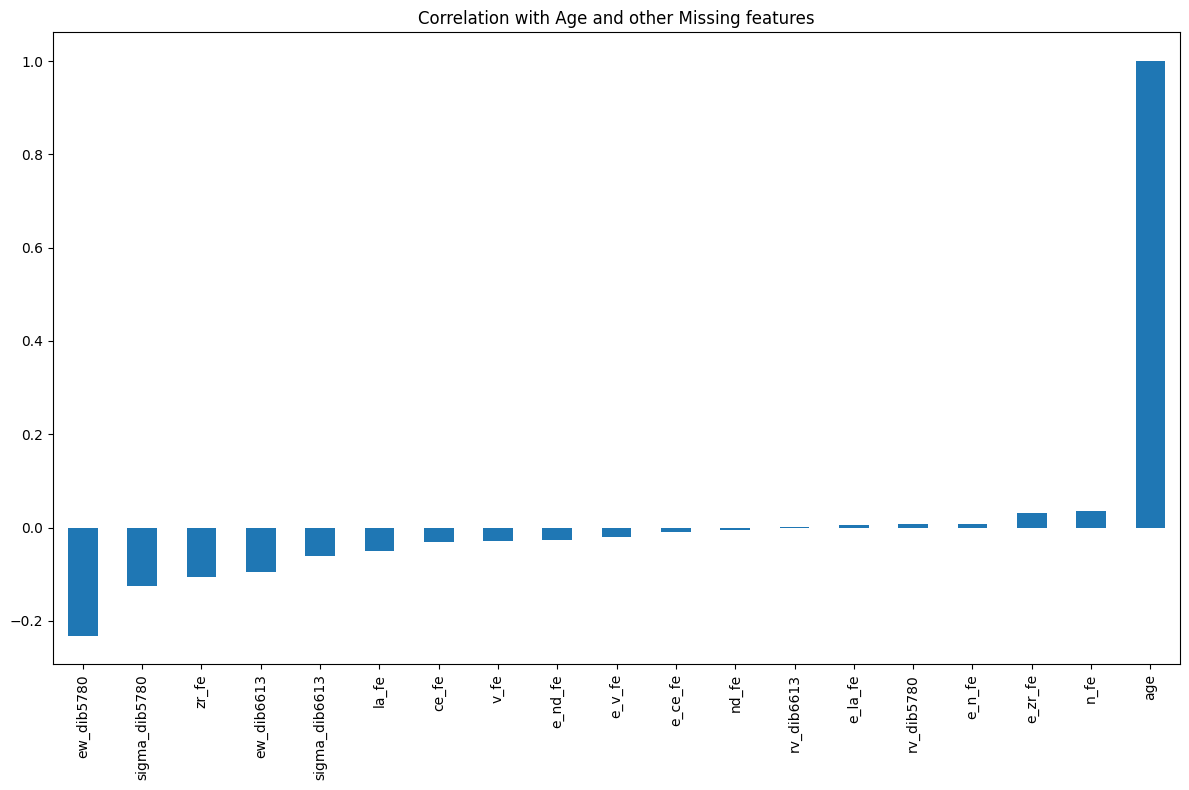

In [ ]:
plt.figure(figsize=(12,8))

df_missing.corr(numeric_only=True)["age"].sort_values().plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Correlation with Age and other Missing features")
plt.tight_layout()
plt.show()

In [ ]:
df_new = df_new.drop(["e_n_fe","e_v_fe","e_la_fe","e_ce_fe","nd_fe","e_nd_fe","rv_dib5780","rv_dib6613","sigma_dib6613","ew_dib5780","sigma_dib5780","ew_dib6613","e_zr_fe","v_fe"],axis=1) # Drop the columns that have missing values and show low correlation with the age column.

In [ ]:
df_missing.head()

,n_fe,e_n_fe,v_fe,e_v_fe,zr_fe,e_zr_fe,la_fe,e_la_fe,ce_fe,e_ce_fe,nd_fe,e_nd_fe,age,ew_dib5780,sigma_dib5780,rv_dib5780,ew_dib6613,sigma_dib6613,rv_dib6613
527249,-0.210696,0.230525,0.302456,0.017678,0.222150,0.075870,0.267804,0.066316,-0.020590,0.103649,0.106711,0.030001,8.294126,0.061018,0.652023,-26.877045,0.014271,0.179941,-3.976509
277830,0.008823,0.074797,0.275368,0.014390,-0.125636,0.061622,0.197451,0.052460,-0.069061,0.069876,-0.036165,0.037621,5.912924,0.189491,0.651715,11.334320,0.104207,0.423934,25.549599
632869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.646065,0.047525,1.016570,-6.337083,NaN,NaN,NaN
410244,0.172969,0.255995,0.181134,0.072332,0.058782,1.043927,0.261049,0.415188,-0.843018,1.507233,0.445048,0.175145,5.695196,NaN,NaN,NaN,0.018110,0.103814,-42.288654
266480,0.913655,0.135017,-0.015413,0.088212,-0.321066,0.502988,0.435778,0.432779,0.100312,0.508471,-0.024314,0.207577,7.294882,0.053368,0.651865,-10.923954,0.024514,0.387594,15.113828


In [ ]:
df_new.shape

(900000, 135)

In [ ]:
for col in df_new:
    percentage = 100 * df_new[col].isnull().sum() / len(df_new)

    if sum(df_new[col].isnull()) != 0: # Lets look at the remaining columns that exist missing values and the percantage of missing values
        print(f"Column name: {col}, percentage: {percentage}")
    else:
        pass

Column name: n_fe, percentage: 24.855
Column name: zr_fe, percentage: 29.006777777777778
Column name: la_fe, percentage: 26.76411111111111
Column name: ce_fe, percentage: 28.725444444444445


In [ ]:
df_new["n_fe"].value_counts() # 61 times -0.075000

n_fe
-0.075000    581
-0.075000      4
 0.366713      3
 0.367017      3
 0.129596      3
            ... 
 0.418088      1
 0.898756      1
 0.430897      1
 0.087800      1
-0.111792      1
Name: count, Length: 670842, dtype: int64

In [ ]:
df_new["zr_fe"].value_counts() # 60 times 0

zr_fe
 0.000000    588
-0.990000      5
-0.515089      3
-0.255492      3
-0.999925      3
            ... 
-0.430908      1
-0.498164      1
 0.137303      1
 0.495746      1
-0.135381      1
Name: count, Length: 635522, dtype: int64

In [ ]:
df_new["la_fe"].value_counts() # 60 times 0.060000

la_fe
 0.060000    598
 0.154045      3
 0.519224      3
 0.272102      3
 0.176684      3
            ... 
 0.348026      1
 0.145512      1
-0.301266      1
 0.018796      1
 0.334853      1
Name: count, Length: 654338, dtype: int64

In [ ]:
df["ce_fe"].value_counts() # 609 times 0.070000

ce_fe
 0.070000    609
 0.163526      3
 0.236897      3
 0.135241      3
-0.155201      3
            ... 
 0.275181      1
 0.402423      1
 0.114942      1
 0.095427      1
 0.088761      1
Name: count, Length: 649958, dtype: int64

In [ ]:
# The remaining columns contain values that are repeated consistently, so fill the missing values using the mode.

In [ ]:
df_new["n_fe"] = df_new["n_fe"].fillna(df_new["n_fe"].mode()[0])
df_new["zr_fe"] = df_new["zr_fe"].fillna(df_new["n_fe"].mode()[0])
df_new["la_fe"] = df_new["la_fe"].fillna(df_new["n_fe"].mode()[0])
df_new["ce_fe"] = df_new["ce_fe"].fillna(df_new["n_fe"].mode()[0])

In [ ]:
df_new.shape

(900000, 135)

In [ ]:
df_new.isnull().sum().sum() # The total missing value is 0 after data processing process

0

In [ ]:
non_numeric_cols = df_new.select_dtypes(exclude=["number"]).columns # select type of data except numbers
print(non_numeric_cols)

Index(['survey_name', 'model_name', 'closest_model', 'fit_global_rv'], dtype='object')


In [ ]:
print(df_new[['survey_name', 'model_name', 'closest_model',"fit_global_rv"]].nunique()) # Except fit_global_rv feature other features has so many unique values so instead of converting to numerical, drop it

survey_name        97
model_name       1162
closest_model    2070
fit_global_rv       2
dtype: int64


In [ ]:
df_new = df_new.drop(['survey_name', 'model_name', 'closest_model'],axis=1)

In [ ]:
df_new["fit_global_rv"].head()

527249    True
277830    True
632869    True
410244    True
266480    True
Name: fit_global_rv, dtype: bool

In [ ]:
df_new["fit_global_rv"] = df_new["fit_global_rv"].astype(float) # change the boolean data type to the float(true/false ==> 1/0)

# astype ==> It's used for change the data type

In [ ]:
df_new["fit_global_rv"].head()

527249    1.0
277830    1.0
632869    1.0
410244    1.0
266480    1.0
Name: fit_global_rv, dtype: float64

In [ ]:
import numpy as np

print(np.isinf(df_new.values).sum())

145


In [ ]:
numeric_cols = df_new.select_dtypes(include=["number"]).columns # delete the all data that has an infinitive value

for col in numeric_cols:
    df_new[col] = np.nan_to_num(df_new[col], nan=0.0, posinf=0.0, neginf=0.0)

In [ ]:
df_new.shape

(900000, 132)

# Creating a Model

In [ ]:
X = df_new.drop("age",axis=1).values # Choose the input features
y = df_new["age"].values             # Choose the age column as a target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101) # divide the data as a train set and test set

In [ ]:
X_train.shape

(630000, 131)

In [ ]:
X_test.shape

(270000, 131)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train) # scale and transform the train data

In [ ]:
X_test = scaler.transform(X_test) # Just transform the test data

In [ ]:
X_train.max() # We scale the data between 1 and 0

1.0000000000000002

In [ ]:
X_train.min() # We scale the data between 1 and 0

0.0

In [ ]:
from tensorflow.keras.models import Sequential # It provides a model architecture
from tensorflow.keras.layers import Dense      # It provides a connection between nörons

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(131,activation="relu")) # the activation function is relu
model.add(Dropout(0.2))

model.add(Dense(65,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(33,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1)) # Model creates a 1 final result

model.compile(optimizer="adam",loss="mse") # choosed mean squared error as a loss function

In [ ]:
# epoch ==> Modelin tüm eğitim verisi üzerinde tam bir kez eğitim yapmasıdır.
# batch_size ==> Modelin bütün veriyi tek bir seferde işlemesi, öğrenmesi yerine parçalara bölüp öğrenmesidir.

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs = 100,batch_size=256, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 8.1482 - val_loss: 2.1382
Epoch 2/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.9772 - val_loss: 2.1282
Epoch 3/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.2990 - val_loss: 1.1053
Epoch 4/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.8774 - val_loss: 1.0020
Epoch 5/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.6434 - val_loss: 0.8619
Epoch 6/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.4946 - val_loss: 1.1583
Epoch 7/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.3982 - val_loss: 0.7492
Epoch 8/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.3466 - val_loss: 0.7022
Epoch 9/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.2902 - val_loss: 0.6481
Epoch 10/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.3000 - val_loss: 0.5865
Epoch 11/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.2257 - val_loss: 0.6462
Epoch 12/100
2461/

In [ ]:
# The callback is executed

# Model Evaluation

In [ ]:
model.history.history

{'loss': [5.282755374908447,
  2.7654318809509277,
  2.1807684898376465,
  1.8264309167861938,
  1.6207880973815918,
  1.5055429935455322,
  1.3948248624801636,
  1.3259464502334595,
  1.3147224187850952,
  1.2810343503952026,
  1.2527012825012207,
  1.2211883068084717,
  1.187404990196228,
  1.1462292671203613,
  1.1900907754898071,
  1.2137677669525146,
  1.2196661233901978,
  1.230465054512024,
  1.1958963871002197,
  1.243728518486023,
  1.2312754392623901,
  1.181942343711853,
  1.2046881914138794,
  1.2275017499923706,
  1.187613844871521,
  1.1752204895019531,
  1.1249264478683472,
  1.1803609132766724,
  1.1411975622177124,
  1.116795539855957,
  1.102270483970642,
  1.0501351356506348,
  1.077353596687317,
  1.055289626121521,
  1.0294820070266724,
  1.1123706102371216,
  1.0384970903396606,
  1.0557035207748413,
  1.1770232915878296,
  1.1131647825241089,
  1.0731565952301025,
  1.074181318283081,
  1.0204006433486938,
  1.0000578165054321,
  0.9759528636932373,
  0.962908208

In [ ]:
loss = pd.DataFrame(model.history.history)

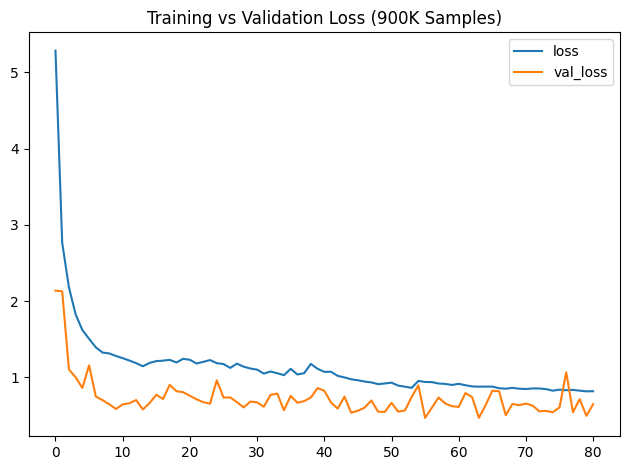

In [ ]:
loss.plot()
plt.title("Training vs Validation Loss (900K Samples)")

plt.tight_layout()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [ ]:
predictions = model.predict(X_test)

8438/8438 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [ ]:
mean_absolute_error(y_test,predictions)

0.618803

In [ ]:
mean_squared_error(y_test,predictions)

0.6484632

In [ ]:
df_new["age"].describe()

count    900000.000000
mean          5.999490
std           3.577521
min           0.001549
25%           3.095893
50%           5.714365
75%           8.615538
max          14.794149
Name: age, dtype: float64

In [ ]:
explained_variance_score(y_test,predictions) # Out of 1 our model variance score is 0.96

0.9679775238037109

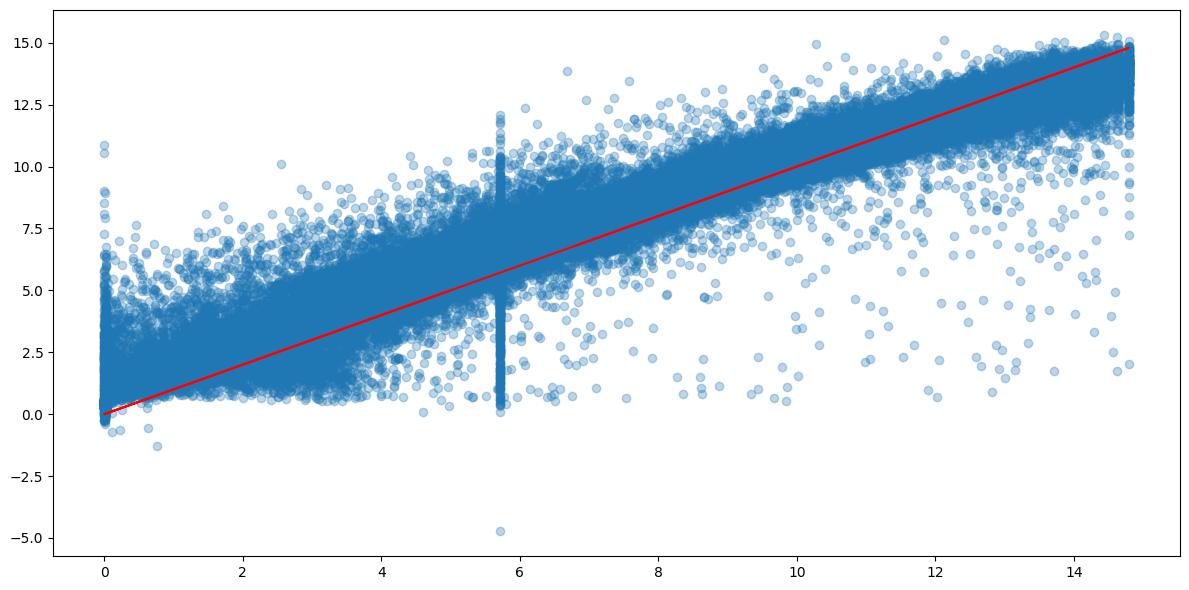

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions,alpha=0.3)
plt.plot(y_test,y_test,"r")

plt.tight_layout()

In [ ]:
for i in range(10):
  age_predictions = df_new.drop("age",axis=1).iloc[i]
  age_predictions = scaler.transform(age_predictions.values.reshape(-1,131))

  prediction = model.predict(age_predictions)
  value = df_new["age"].iloc[i]

  print(f"Prediction is: {prediction}, Real value is: {value}") # First ten predictions vs real values


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Prediction is: [[9.049413]], Real value is: 8.2941255569458
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction is: [[6.6988125]], Real value is: 5.912923812866211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction is: [[2.1694057]], Real value is: 1.6460646390914917
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction is: [[6.269237]], Real value is: 5.695196151733398
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction is: [[8.066973]], Real value is: 7.294881820678711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction is: [[9.564585]], Real value is: 9.533158302307129
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction is: [[12.698708]], Real value is: 12.904332160949707
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction is: [[4.211873]], Real value is: 3.9786159992218018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction is: [[5.878948]], Real value is: 5.119854927062988
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction is: [[6.9020405]], Real value is: 6.5047307014